# Basic Setup and Installations of required tools

In [1]:
#installing Pytorch and torchvision from source
!pip install -U torch torchvision
!pip install git+https://github.com/facebookresearch/fvcore.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/facebookresearch/fvcore.git to /tmp/pip-req-build-ohg8hlvq
  Running command git clone -q https://github.com/facebookresearch/fvcore.git /tmp/pip-req-build-ohg8hlvq
     |████████████████████████████████| 596 kB 30.8 MB/s 
  Created wheel for fvcore: filename=fvcore-0.1.5-py3-none-any.whl size=65351 sha256=87933da6ea06670677cf24b2165e86127490218bfdb0754189a835029e2bc055
  Stored in directory: /tmp/pip-ephem-wheel-cache-9msez8i0/wheels/24/1d/09/8167de727fe5b74f832b6fcb5d9069d8f03ca29f337bfe484d
Successfully built fvcore
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [2]:
# Checking availability of GPU and required OS
import torch, torchvision
print("Yesss !!! GPU is Enabled." if torch.cuda.is_available() else "Opss! GPU is disabled.")
print("\nFollowing are the details of OS:\n")
!gcc --version

Yesss !!! GPU is Enabled.

Following are the details of OS:

gcc (Ubuntu 7.5.0-3ubuntu1~18.04) 7.5.0
Copyright (C) 2017 Free Software Foundation, Inc.
This is free software; see the source for copying conditions.  There is NO
warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.



In [3]:
#checking python and opencv version (to confirm that they are already installed)
import cv2
!python --version
print(f"OpenCV Version : {cv2.__version__}")

Python 3.7.13
OpenCV Version : 4.1.2


In [4]:
# cloning repo for source and other modules
!git clone https://github.com/facebookresearch/detectron2 detectron2_repo

Cloning into 'detectron2_repo'...
remote: Enumerating objects: 14392, done.
remote: Counting objects: 100% (165/165), done.
remote: Compressing objects: 100% (109/109), done.
remote: Total 14392 (delta 58), reused 156 (delta 55), pack-reused 14227
Receiving objects: 100% (14392/14392), 5.97 MiB | 26.34 MiB/s, done.
Resolving deltas: 100% (10359/10359), done.


In [5]:
# installing from repo (making build)
!pip install -e detectron2_repo

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Obtaining file:///content/detectron2_repo
     |████████████████████████████████| 79 kB 7.9 MB/s 
     |████████████████████████████████| 151 kB 67.2 MB/s 
     |████████████████████████████████| 1.4 MB 55.5 MB/s 
     |████████████████████████████████| 431 kB 71.3 MB/s 
     |████████████████████████████████| 248 kB 76.0 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 96 kB 7.5 MB/s 
     |████████████████████████████████| 843 kB 62.4 MB/s 
     |████████████████████████████████| 117 kB 75.0 MB/s 
  Created wheel for antlr4-python3-runtime: filename=antlr4_python3_runtime-4.9.3-py3-none-any.whl size=144575 sha256=45c5a9ca5971086e5b97ba9ac3c2aeb89d1703d3ade0312c5948cc7f974aefb2
  Stored in directory: /root/.cache/pip/wheels/

### Getting the Tools ready

In [1]:
# import some common libraries
import os, json, cv2, random
from google.colab.patches import cv2_imshow
 
# import some common detectron2 utilities
from detectron2.engine import DefaultTrainer
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog
from detectron2.data.datasets import register_coco_instances

# imports for coco evaluation

from detectron2.evaluation import COCOEvaluator, inference_on_dataset
from detectron2.data import build_detection_test_loader

### Getting the data Ready

In [ ]:
### unzipping the data file to be used for model training and testing
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="KU2Vrtyb4K3RvVYu5X31")
project = rf.workspace("projectsed").project("butterfly-class")
dataset = project.version(1).download("coco-segmentation")

**Registering the dataset with Detectron-2 for model training**

In [3]:
annotations_path="/content/butterfly-class-1/train/_annotations.coco.json"
images_dir_path="/content/butterfly-class-1/train"
dataset = 'butterfly-tr-1'
register_coco_instances(dataset, {}, annotations_path, images_dir_path)
metadata_tr = MetadataCatalog.get(dataset)
data_dict_tr = DatasetCatalog.get(dataset)
metadata_tr


Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.



Metadata(evaluator_type='coco', image_root='/content/butterfly-class-1/train', json_file='/content/butterfly-class-1/train/_annotations.coco.json', name='butterfly-tr-1', thing_classes=['butterfly', 'American Copper', 'Cabbage White', 'Common Buckeye', 'Crimson Patched LongWing', 'Giant Swallow Tail', 'Monarch', 'Mourning Cloak', 'Painted Lady', 'Red Admiral', 'Zebra LongWing'], thing_dataset_id_to_contiguous_id={0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9, 10: 10})

**Visualizing some random images to see how data looks like**

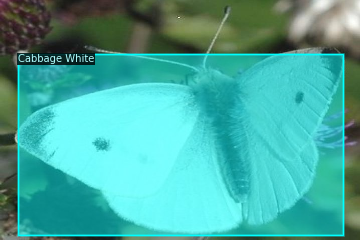

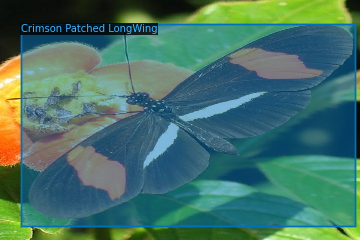

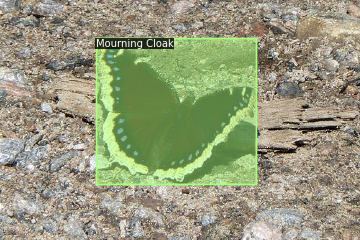

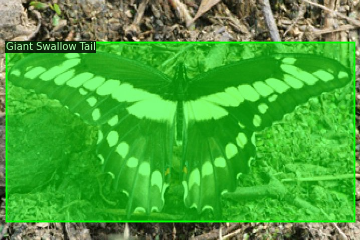

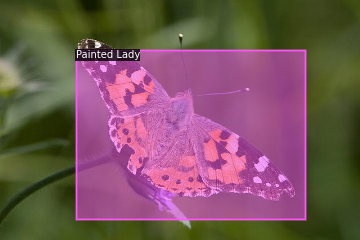

In [4]:
for d in random.sample(data_dict_tr, 5):
    img = cv2.imread(d["file_name"])
    visualizer = Visualizer(img[:, :, ::-1], metadata=metadata_tr, scale=0.5)
    vis = visualizer.draw_dataset_dict(d)
    cv2_imshow(vis.get_image()[:, :, ::-1])

### Model Training


In [5]:
### using model weights trained on image net dataset to fine tune it with our own data
model_path = '/content/detectron2_repo/configs/COCO-InstanceSegmentation/mask_rcnn_R_101_C4_3x.yaml'
model_weights="detectron2://ImageNetPretrained/MSRA/R-101.pkl"

In [6]:
### setting model hyperparameters
num_classes = 10
lr = 0.00125
iters = 5000

In [ ]:
### model setup and training
cfg = get_cfg()
cfg.merge_from_file(model_path)
cfg.DATASETS.TRAIN = ("butterfly-tr-1",)
cfg.DATASETS.TEST = ()  # no metrics implemented for this dataset
cfg.DATALOADER.NUM_WORKERS = 2
cfg.MODEL.WEIGHTS = model_weights  
cfg.SOLVER.IMS_PER_BATCH = 2
cfg.SOLVER.BASE_LR = lr
cfg.SOLVER.MAX_ITER = iters 
cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 32 
cfg.MODEL.ROI_HEADS.NUM_CLASSES = num_classes  
os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)
trainer = DefaultTrainer(cfg)
trainer.resume_or_load(resume=False)
trainer.train()

[06/18 06:15:45 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): ResNet(
    (stem): BasicStem(
      (conv1): Conv2d(
        3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
        (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
      )
    )
    (res2): Sequential(
      (0): BottleneckBlock(
        (shortcut): Conv2d(
          64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False
          (norm): FrozenBatchNorm2d(num_features=256, eps=1e-05)
        )
        (conv1): Conv2d(
          64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
        (conv2): Conv2d(
          64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
        (conv3): Conv2d(
          64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False
          (norm): FrozenBatchNorm2d(num_features=256, eps=1e-05)
 

Some model parameters or buffers are not found in the checkpoint:
proposal_generator.rpn_head.anchor_deltas.{bias, weight}
proposal_generator.rpn_head.conv.{bias, weight}
proposal_generator.rpn_head.objectness_logits.{bias, weight}
roi_heads.box_predictor.bbox_pred.{bias, weight}
roi_heads.box_predictor.cls_score.{bias, weight}
roi_heads.mask_head.deconv.{bias, weight}
roi_heads.mask_head.predictor.{bias, weight}
The checkpoint state_dict contains keys that are not used by the model:
  fc1000.{bias, weight}


[06/18 06:15:46 d2.engine.train_loop]: Starting training from iteration 0
[06/18 06:15:59 d2.utils.events]:  eta: 0:55:26  iter: 19  total_loss: 4.932  loss_cls: 2.323  loss_box_reg: 0.9768  loss_mask: 0.6927  loss_rpn_cls: 0.6335  loss_rpn_loc: 0.3028  time: 0.6724  data_time: 0.0201  lr: 2.4976e-05  max_mem: 8013M
[06/18 06:16:13 d2.utils.events]:  eta: 0:55:00  iter: 39  total_loss: 4.067  loss_cls: 1.575  loss_box_reg: 0.974  loss_mask: 0.6905  loss_rpn_cls: 0.5731  loss_rpn_loc: 0.2877  time: 0.6709  data_time: 0.0090  lr: 4.9951e-05  max_mem: 8013M
[06/18 06:16:26 d2.utils.events]:  eta: 0:54:09  iter: 59  total_loss: 3.568  loss_cls: 1.134  loss_box_reg: 1.029  loss_mask: 0.6855  loss_rpn_cls: 0.4392  loss_rpn_loc: 0.2725  time: 0.6609  data_time: 0.0082  lr: 7.4926e-05  max_mem: 8013M
[06/18 06:16:38 d2.utils.events]:  eta: 0:53:13  iter: 79  total_loss: 3.28  loss_cls: 0.9789  loss_box_reg: 0.9753  loss_mask: 0.6804  loss_rpn_cls: 0.3799  loss_rpn_loc: 0.2663  time: 0.6501  da

### Model Evaluation

In [ ]:
def coco_evaluator(val_data,trainer):
  """
  This function takes validation/test data and trainer with which model was trained and returns the coco evaluation report.
  val_data: registered coco dataset (val/test).
  trainer: with which model was trained.
  """
  cfg = get_cfg()
  evaluator = COCOEvaluator(val_data, cfg, False, output_dir="./output/")
  val_loader = build_detection_test_loader(cfg, val_data)
  print(inference_on_dataset(trainer.model, val_loader, evaluator))


def visualize_predictions(predictor,imgs_path,metadata,single_img=False,num_imgs=5,scale=0.7):
  """
  This function takes predictor and test images and visualise the predictions on it.
  predictor: trained model.
  imgs_path: str, path of directory for test images or path of single image in case of single_img=True.
  metadata: dataset matadata on which model was trained.
  num_imgs: num of images to display.

  """
  if single_img:
      im=cv2.imread(imgs_path)
      outputs=predictor(im)
      v = Visualizer(im[:, :,::-1], metadata, scale=scale)
      out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
      im=out.get_image()[:, :, ::-1]
      cv2_imshow(im)

  else:
      for img in os.listdir(imgs_path)[:num_imgs]:
        im=cv2.imread(os.path.join(imgs_path,img))
        outputs=predictor(im)
        v = Visualizer(im[:, :,::-1], metadata, scale=scale)
        out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
        im=out.get_image()[:, :, ::-1]
        cv2_imshow(im)

**Registering the test dataset to evaluate the model's performance**

In [7]:
annotations="/content/butterfly-class-1/test/_annotations.coco.json"
imgs_dir='/content/butterfly-class-1/test'
dataset_val = 'butterfly-val-2'
register_coco_instances(dataset_val, {}, annotations, imgs_dir)
metadata_val = MetadataCatalog.get(dataset)
data_dict_val = DatasetCatalog.get(dataset)
metadata_val


Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.



Metadata(evaluator_type='coco', image_root='/content/butterfly-class-1/train', json_file='/content/butterfly-class-1/train/_annotations.coco.json', name='butterfly-tr-1', thing_classes=['butterfly', 'American Copper', 'Cabbage White', 'Common Buckeye', 'Crimson Patched LongWing', 'Giant Swallow Tail', 'Monarch', 'Mourning Cloak', 'Painted Lady', 'Red Admiral', 'Zebra LongWing'], thing_dataset_id_to_contiguous_id={0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9, 10: 10})

In [ ]:
coco_evaluator(dataset_val,trainer)

WARNING [06/18 07:13:13 d2.evaluation.coco_evaluation]: COCO Evaluator instantiated using config, this is deprecated behavior. Please pass in explicit arguments instead.
[06/18 07:13:13 d2.data.datasets.coco]: Loaded 25 images in COCO format from /content/test/_annotations.coco.json
[06/18 07:13:13 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in inference: [ResizeShortestEdge(short_edge_length=(800, 800), max_size=1333, sample_style='choice')]
[06/18 07:13:13 d2.data.common]: Serializing 25 elements to byte tensors and concatenating them all ...
[06/18 07:13:13 d2.data.common]: Serialized dataset takes 0.01 MiB
[06/18 07:13:13 d2.evaluation.evaluator]: Start inference on 25 batches


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


[06/18 07:13:21 d2.evaluation.evaluator]: Inference done 11/25. Dataloading: 0.0013 s/iter. Inference: 0.6415 s/iter. Eval: 0.0022 s/iter. Total: 0.6450 s/iter. ETA=0:00:09
[06/18 07:13:26 d2.evaluation.evaluator]: Inference done 19/25. Dataloading: 0.0022 s/iter. Inference: 0.6518 s/iter. Eval: 0.0023 s/iter. Total: 0.6566 s/iter. ETA=0:00:03
[06/18 07:13:30 d2.evaluation.evaluator]: Total inference time: 0:00:13.389508 (0.669475 s / iter per device, on 1 devices)
[06/18 07:13:30 d2.evaluation.evaluator]: Total inference pure compute time: 0:00:13 (0.657958 s / iter per device, on 1 devices)
[06/18 07:13:30 d2.evaluation.coco_evaluation]: Preparing results for COCO format ...
[06/18 07:13:30 d2.evaluation.coco_evaluation]: Saving results to ./output/coco_instances_results.json
[06/18 07:13:30 d2.evaluation.coco_evaluation]: Evaluating predictions with unofficial COCO API...
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
[06/18 07:13:30 d2.evaluation.f

### Making prediction on unseen images

In [ ]:
trained_model_weights="/content/output/model_final.pth"
cfg = get_cfg()
cfg.merge_from_file(model_path)
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5
cfg.MODEL.WEIGHTS = trained_model_weights
cfg.MODEL.ROI_HEADS.NUM_CLASSES = num_classes
predictor = DefaultPredictor(cfg)


[06/18 07:17:16 d2.checkpoint.c2_model_loading]: Following weights matched with model:
| Names in Model                                  | Names in Checkpoint                                                                         | Shapes                                          |
|:------------------------------------------------|:--------------------------------------------------------------------------------------------|:------------------------------------------------|
| backbone.res2.0.conv1.*                         | backbone.res2.0.conv1.{norm.bias,norm.running_mean,norm.running_var,norm.weight,weight}     | (64,) (64,) (64,) (64,) (64,64,1,1)             |
| backbone.res2.0.conv2.*                         | backbone.res2.0.conv2.{norm.bias,norm.running_mean,norm.running_var,norm.weight,weight}     | (64,) (64,) (64,) (64,) (64,64,3,3)             |
| backbone.res2.0.conv3.*                         | backbone.res2.0.conv3.{norm.bias,norm.running_mean,norm.running_var,norm.weig

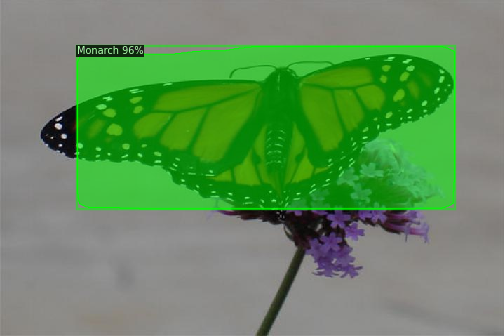

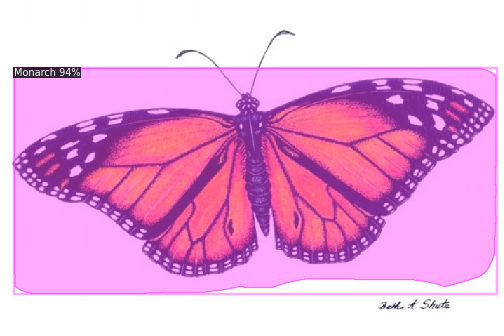

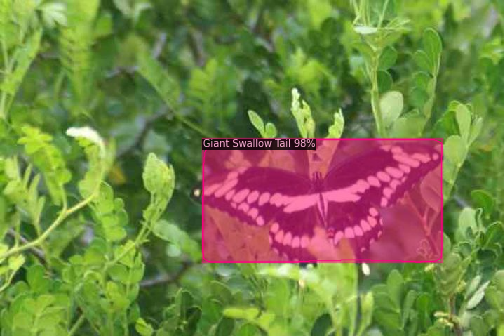

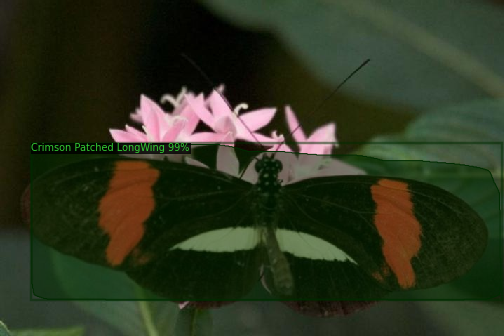

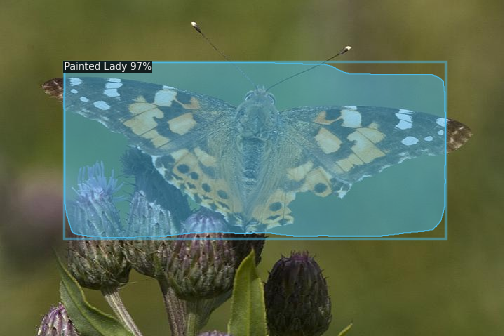

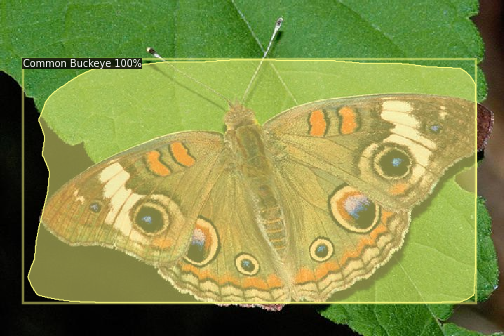

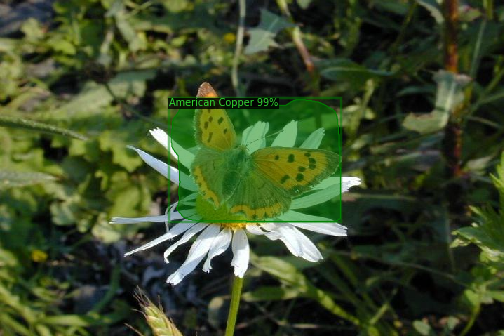

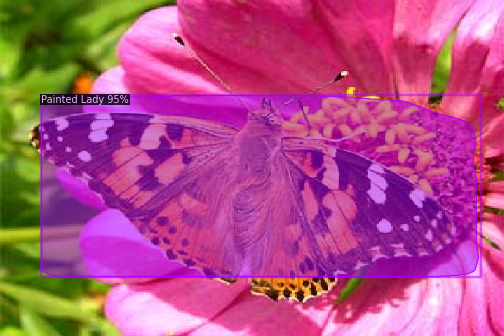

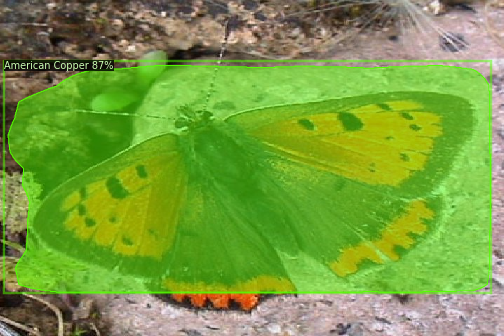

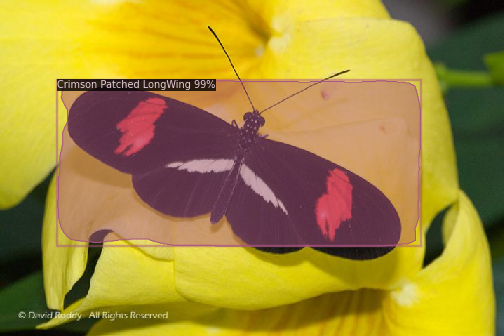

In [ ]:
imgs_dir="/content/test"
visualize_predictions(predictor=predictor,imgs_path=imgs_dir,metadata=metadata_val,num_imgs=10)